<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/notebook/example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [2]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

multirex version 0.1.4


First we can create the components of a planetary system.

In [3]:
star=mrex.Star(temperature=5777,radius=1,mass=1)
planet=mrex.Planet(radius=1,mass=1)
system=mrex.System(star=star,planet=planet,sma=1)




We can create an atmosphere with a fill gas and other molecules dictionary specifying a range or value of log10 mixing ratio for each molecule.

In [4]:
atmo=mrex.Atmosphere(temperature=288,base_pressure=1e5,top_pressure=1,
                     fill_gas="N2",composition={"CO2":(-4,-1),"H2O":(-4,-2),
                                                "CH4":(-6,-3),"O3":-6})

system.planet.set_atmosphere(atmo)

Now we can initialize our model and use the other features of multirex.

In [5]:
system.make_transmission_model()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [6]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)

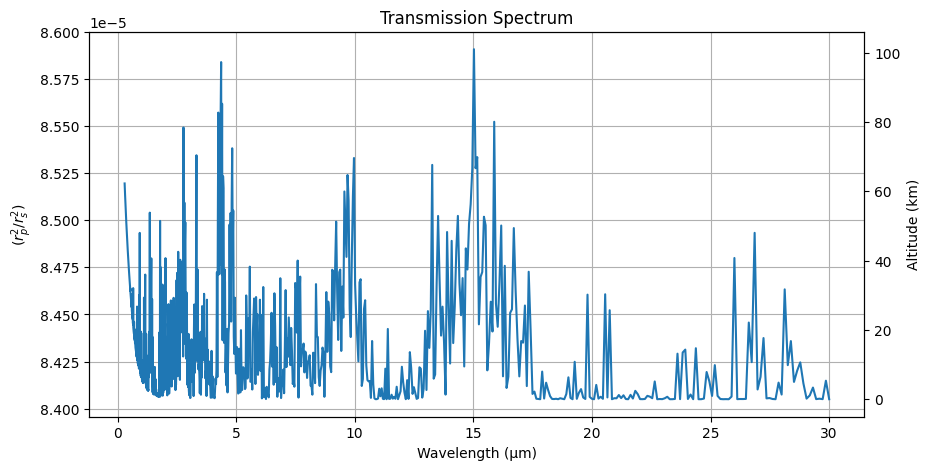

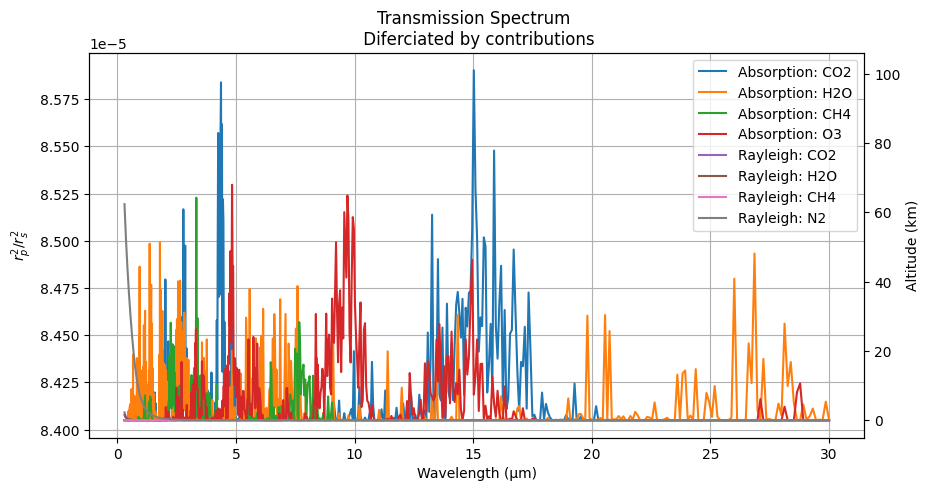

(<Axes: title={'center': 'Transmission Spectrum \n Diferciated by contributions'}, xlabel='Wavelength (μm)', ylabel='$r_p^2$/$r_s^2$'>,
 <Figure size 1000x500 with 2 Axes>)

In [7]:
system.plot_spectrum(wn_grid=wn,title="Transmission Spectrum")

system.plot_full_spectrum(wn_grid=wn,title="Transmission Spectrum \n Diferciated by contributions")

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [8]:
spectra,obs=system.explore_multiverse(wn_grid=wn,snr=10,n_iter=10, labels="O3",
                                      n_observations=1000,spectra=True,observations=True,header=True)

Exploring universes:   0%|          | 0/10 [00:00<?, ?it/s]

Exploring universes: 100%|██████████| 10/10 [00:02<00:00,  4.89it/s]


Generating observations for 10 spectra...


In [9]:
spectra

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,1.710782e+09,1,1,1.710782e+09,288,100000.0,1,N2,1.710782e+09,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,NaN,1,1,NaN,288,100000.0,1,N2,NaN,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [10]:
list(obs.columns)

['sma',
 'seed',
 'p radius',
 'p mass',
 'p seed',
 'atm temperature',
 'atm base_pressure',
 'atm top_pressure',
 'atm fill_gas',
 'atm seed',
 'atm CO2',
 'atm H2O',
 'atm CH4',
 'atm O3',
 's temperature',
 's radius',
 's mass',
 's seed',
 'label',
 'SNR',
 29.999999999999996,
 29.862024862864565,
 29.72468429701139,
 29.58797538393846,
 29.451895218566502,
 29.31644090917717,
 29.181609577351622,
 29.04739835790937,
 28.913804398847354,
 28.780824861279424,
 28.648456919375892,
 28.516697760303586,
 28.385544584165988,
 28.25499460394385,
 28.12504504543585,
 27.995693147199713,
 27.866936160493502,
 27.73877134921721,
 27.61119598985466,
 27.484207371415547,
 27.35780279537789,
 27.23197957563068,
 27.106735038416772,
 26.982066522276128,
 26.857971377989184,
 26.7344469685206,
 26.611490668963217,
 26.48909986648226,
 26.36727196025986,
 26.246004361439727,
 26.125294493072168,
 26.00513979005933,
 25.88553769910067,
 25.766485678638745,
 25.64798119880514,
 25.530021741366735

In [11]:
obs["atm CO2"].value_counts()

atm CO2
-3.060367090205992     1000
-3.060629857154934     1000
-2.5027990620303973    1000
-2.4649954452368306    1000
-1.5791506750762574    1000
-1.4564943183281223    1000
-1.5010224719549332    1000
-1.3835026808354254    1000
-1.3143542709940412    1000
-1.8001533127948974    1000
Name: count, dtype: int64

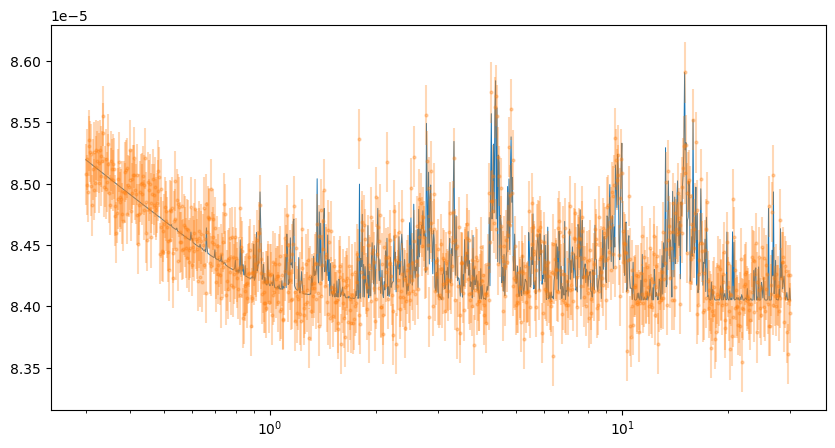

In [12]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=(max(obs.iloc[1,-1000:])-min(obs.iloc[1,-1000:]))/obs.loc[0,"SNR"]
             ,label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")